# COMPARISON OF PYTHON MODEL TEMPERATURE PREDICTION AND MODEL OUTPUTS


In [10]:
# Perform a comparison between the predicted future temps from historical data and the actual future temps dataset from the model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
historical_predictions = pd.read_csv('../data/processed/predicted_mean_temperature_2015_2099.csv') #Exported as csv from historical_temo_trend_analysis_notebook
future_temps = pd.read_csv('../data/processed/mean_future_temp_clean.csv' ) #CMIP6 MIROC6 Temperatures under SSP2-4.5 scenario

# View datasets
print(historical_predictions.head())
print(future_temps.head())

# Convert both datasets to dataframes
historical_predictions_df = pd.DataFrame(historical_predictions)
future_temps_df = pd.DataFrame(future_temps)

   Year  Predicted_Mean_Temperature
0  2015                   22.498846
1  2016                   22.515105
2  2017                   22.531364
3  2018                   22.547622
4  2019                   22.563881
  code    name        date  temp_mean  temp_outlier
0  MWI  Malawi  2015-07-01      22.90         False
1  MWI  Malawi  2016-07-01      22.65         False
2  MWI  Malawi  2017-07-01      23.15         False
3  MWI  Malawi  2018-07-01      23.52         False
4  MWI  Malawi  2019-07-01      22.46         False


In [11]:
#Checking the data types and information for both dataframes
future_temps_df.info()
historical_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code          86 non-null     object 
 1   name          86 non-null     object 
 2   date          86 non-null     object 
 3   temp_mean     86 non-null     float64
 4   temp_outlier  86 non-null     bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 2.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        85 non-null     int64  
 1   Predicted_Mean_Temperature  85 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.5 KB


In [12]:
# Only keep date amd temp_mean columns of the future_temp, then rename to Year and Modelled Mean Temperature
future_temps_new = future_temps_df.copy()
future_temps_new = future_temps_new[['date', 'temp_mean']]
future_temps_new.rename(columns={'date': 'Year', 'temp_mean': 'Modelled_Mean_Temperature'}, inplace=True)

# Convert Year column to type int for future_temps_new and only keep year part
future_temps_new['Year'] = future_temps_new['Year'].str[:4]
future_temps_new['Year'] = future_temps_new['Year'].astype(int)

#print new future temps dataframe
print(future_temps_new.head())

   Year  Modelled_Mean_Temperature
0  2015                      22.90
1  2016                      22.65
2  2017                      23.15
3  2018                      23.52
4  2019                      22.46


In [13]:
# What is the correlation between the two temperature columns
# Create a comparison dataframe by merging the two dataframes on Year
comparison_df = pd.merge(historical_predictions_df, future_temps_new, on='Year', how='inner')

comparison_df['Predicted_Mean_Temperature'] = pd.to_numeric(comparison_df['Predicted_Mean_Temperature'], errors='coerce')
comparison_df['Modelled_Mean_Temperature'] = pd.to_numeric(comparison_df['Modelled_Mean_Temperature'], errors='coerce')

correlation = comparison_df['Predicted_Mean_Temperature'].corr(comparison_df['Modelled_Mean_Temperature'])
print(f'Correlation between Predicted and Modelled Mean Temperatures: {correlation:.4f}')

# Export comparison dataframe to CSV
comparison_df.to_csv('../data/processed/predicted_vs_modelled_mean_temperatures_2015_2099.csv', index=False)

Correlation between Predicted and Modelled Mean Temperatures: 0.7318


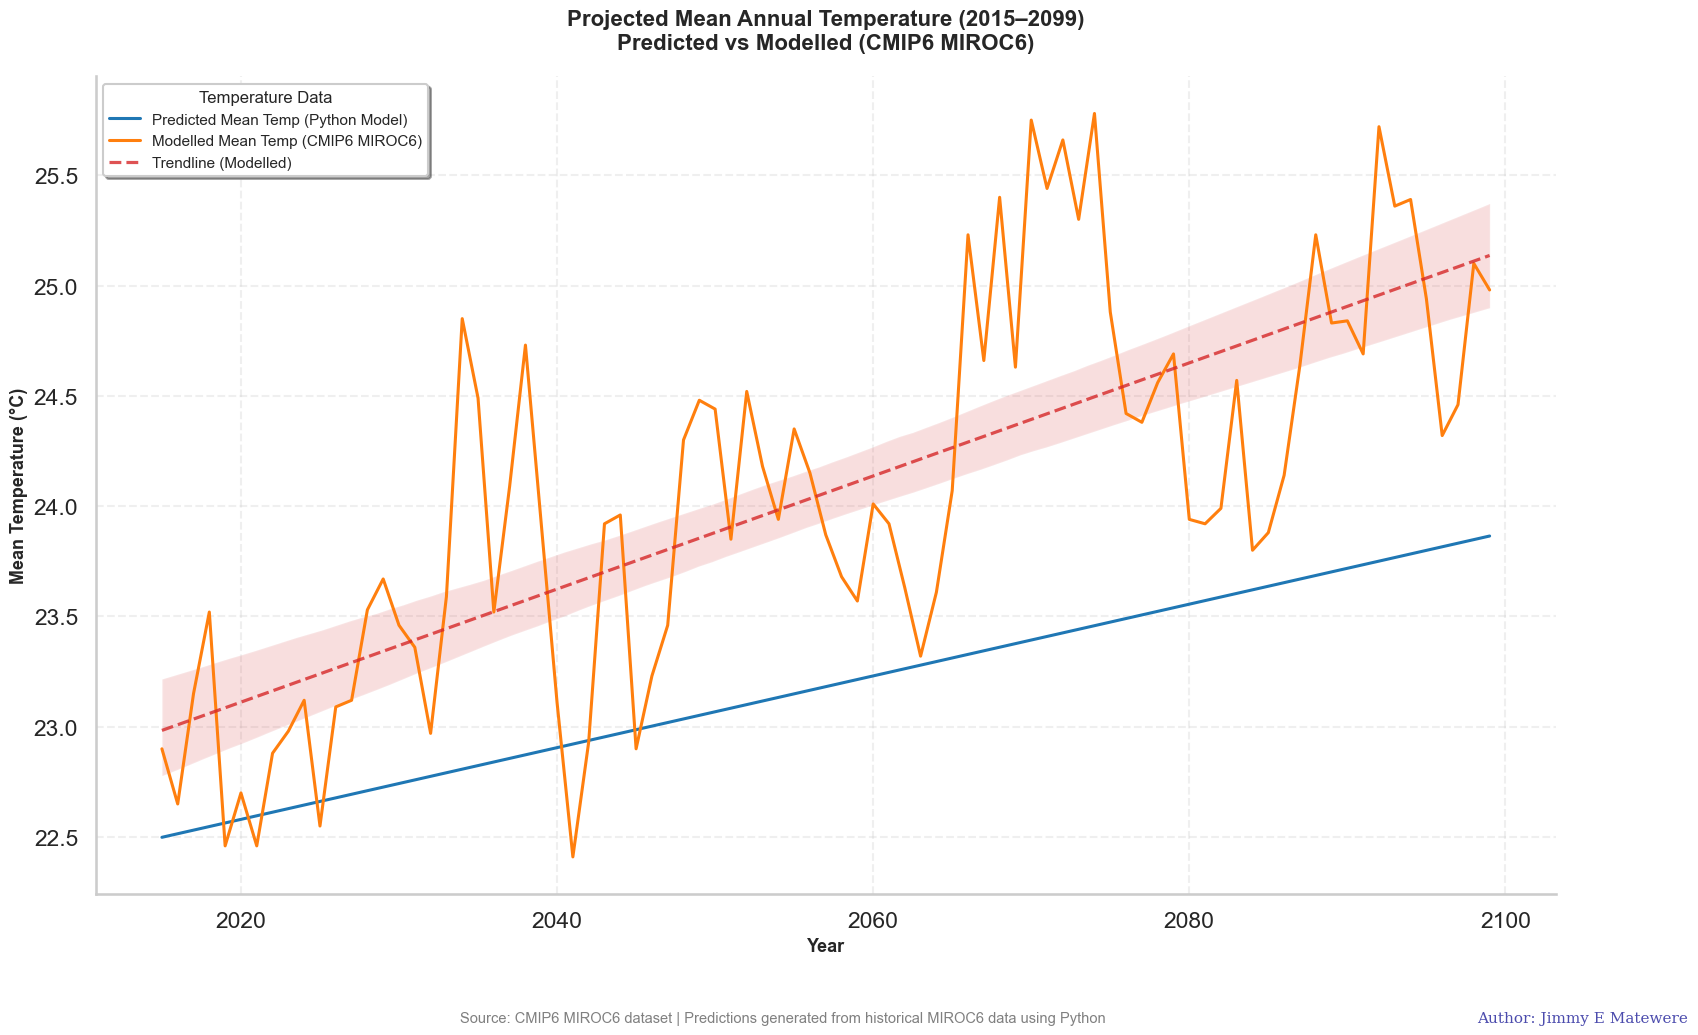

In [14]:
# Temperature trend comparison of Predicted (Python model) vs CMIP6 MIROC6

sns.set_theme(style="whitegrid", context="talk")
plt.figure(figsize=(16, 10))

# Plot the predicted temps from the Python model
sns.lineplot( data=comparison_df, x='Year', y='Predicted_Mean_Temperature',label='Predicted Mean Temp (Python Model)', color='#1f77b4', linewidth=2.2)

# Plot the modelled temps from MIROC6 (CMIP6)
sns.lineplot(data=comparison_df, x='Year', y='Modelled_Mean_Temperature', label='Modelled Mean Temp (CMIP6 MIROC6)', color='#ff7f0e', linewidth=2.2)
sns.regplot(data=comparison_df, x='Year', y='Modelled_Mean_Temperature', scatter=False, color='#d62728', 
            line_kws={"linestyle": "--", "linewidth": 2.3, "alpha": 0.8}, label='Trendline (Modelled)')


plt.title('Projected Mean Annual Temperature (2015–2099)\nPredicted vs Modelled (CMIP6 MIROC6)',fontsize=16, weight='bold', pad=20)
plt.xlabel('Year', fontsize=13, fontweight='bold')
plt.ylabel('Mean Temperature (°C)', fontsize=13, fontweight='bold')
plt.figtext(0.5, -0.04,
    'Source: CMIP6 MIROC6 dataset | Predictions generated from historical MIROC6 data using Python',
    ha='center', fontsize=10.5, color='gray' )
plt.figtext(1, -0.04,"Author: Jimmy E Matewere", fontsize=11, ha='center', alpha=0.7,
             color='darkblue', rotation=0, fontfamily='serif')
plt.legend( title='Temperature Data', title_fontsize=12,
    fontsize=11, loc='upper left', frameon=True, fancybox=True, shadow=True)

plt.grid(True, linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

## Conclusion

This analysis compared predicted mean temperatures, generated using a simple Python-based statistical model trained on CMIP6 MIROC6 historical data, with the modelled mean temperatures directly from the MIROC6 global climate model.

The results show that the Python predictions follow the same overall trend as the MIROC6 projections, though the predicted values are slightly lower. This makes sense given how much more complex and detailed MIROC6 is compared to my simpler setup.

The correlation coefficient of 0.7318 shows that even a basic statistical approach can capture much of the pattern seen in the full climate model.

**Future directions for this work include:**
- Extending the model to encompass *precipitation and additional climate variables*.
- Performing ensemble comparisons by integrating outputs from *multiple CMIP6 models*.
- Systematically quantifying and correcting *uncertainty and bias* between predicted and modeled outputs.

This notebook highlights the how the use of  **statistical prediction techniques** can closely reveal trends similar to **climate model simulations** for  temperature trend analysis. 

